In [1]:
import numpy as np
import matplotlib.pyplot as plt

all patterns:


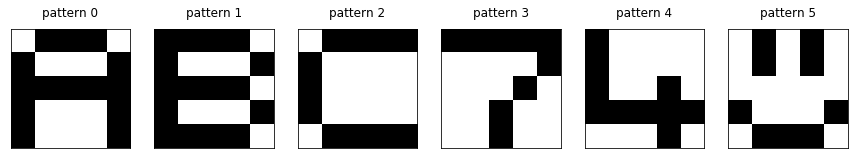

In [2]:
patterns = [
    np.array([[0, 1, 1, 1, 0],
              [1, 0, 0, 0, 1],
              [1, 1, 1, 1, 1],
              [1, 0, 0, 0, 1],
              [1, 0, 0, 0, 1]]),
    np.array([[1, 1, 1, 1, 0],
              [1, 0, 0, 0, 1],
              [1, 1, 1, 1, 0],
              [1, 0, 0, 0, 1],
              [1, 1, 1, 1, 0]]),
    np.array([[0, 1, 1, 1, 1],
              [1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 1, 1, 1, 1]]),
    np.array([[1, 1, 1, 1, 1],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0]]),
    np.array([[1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [1, 0, 0, 1, 0],
              [1, 1, 1, 1, 1],
              [0, 0, 0, 1, 0]]),
    np.array([[0, 1, 0, 1, 0],
              [0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0],
              [1, 0, 0, 0, 1],
              [0, 1, 1, 1, 0]])
]

fig, axes = plt.subplots(nrows=1, ncols=len(patterns), figsize=(15, 3))

for i, pattern in enumerate(patterns):
    axes[i].set_title(f'pattern {i}')
    axes[i].matshow(pattern, cmap='binary')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
print('all patterns:')
plt.show()

In [3]:
def mask(pattern):
    vmask = np.vectorize(lambda x: 1 if x == 1 else -1)
    return vmask(pattern)

def energy(pattern, w):
    size = pattern.size
    e = 0
    for i in range(size):
        for j in range(size):
            if i != j:
                e += pattern[i] * pattern[j] * w[i][j]
    return -e / 2

def hopfield_memorize(patterns):
    patterns = [mask(p.flatten()) for p in patterns]
    size = patterns[0].size
    w = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if i != j:
                w[i][j] = sum([p[i] * p[j] for p in patterns]) #/ size
    return w

def hopfield_recall(pattern, w):
    shape = pattern.shape
    pattern = mask(pattern.flatten())
    while True:
        changes = 0
        for i in range(pattern.size):
            h = 0
            for j in range(pattern.size):
                if i != j:
                    h += w[i][j] * pattern[j]
            if (pattern[i] * h < 0):
                pattern[i] = -pattern[i]
                changes += 1
#         e = energy(pattern, w)
#         print(e)
        plt.show()
        if changes == 0:
            return pattern.reshape(shape)
                

def distort(pattern, ratio):
    shape = pattern.shape
    pattern = mask(pattern.flatten())
    flip_amount = int(ratio * pattern.size)
    indices = list(range(pattern.size))
    np.random.shuffle(indices)
    indices = indices[:flip_amount]
    for i in indices:
        pattern[i] = -pattern[i]
    return pattern.reshape(shape)

In [4]:
def show_patterns(patterns):
    fig, axes = plt.subplots(nrows=1, ncols=len(patterns), figsize=(15, 3))
    if len(patterns) == 1:
        axes.matshow(patterns[0], cmap='binary')
    else:
        for i, pattern in enumerate(patterns):
            axes[i].matshow(pattern, cmap='binary')
    plt.show()

def show(pattern_numbers, ratio):
    picked_patterns = [patterns[i] for i in pattern_numbers]
    w = hopfield_memorize(picked_patterns)
    distorted_patterns = [distort(p, ratio) for p in picked_patterns]
    recalled_patterns = [hopfield_recall(p, w) for p in distorted_patterns]
    
    print('using patterns', pattern_numbers, f'({len(pattern_numbers) / patterns[0].size} N)')
    show_patterns(picked_patterns)
    
    print('distorted with ratio', ratio)
    show_patterns(distorted_patterns)
    
    print('recalled')
    show_patterns(recalled_patterns)

using patterns [0, 1, 2] (0.12 N)


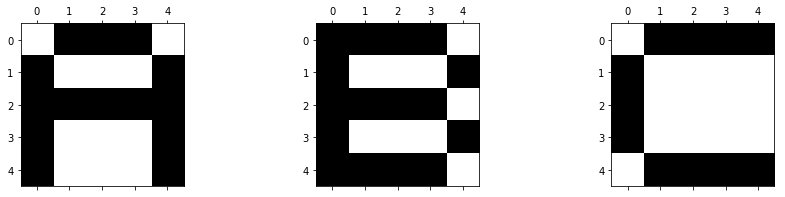

distorted with ratio 0.1


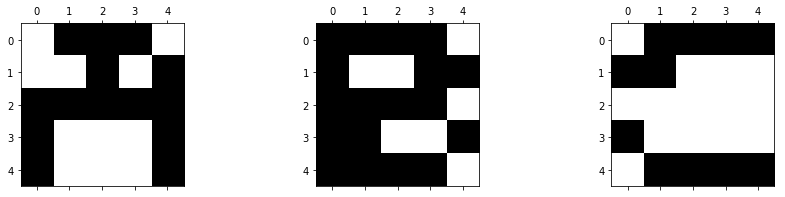

recalled


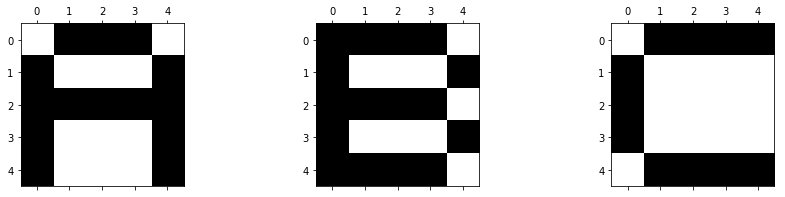

In [5]:
show([0, 1, 2], .1)

using patterns [3, 4, 5] (0.12 N)


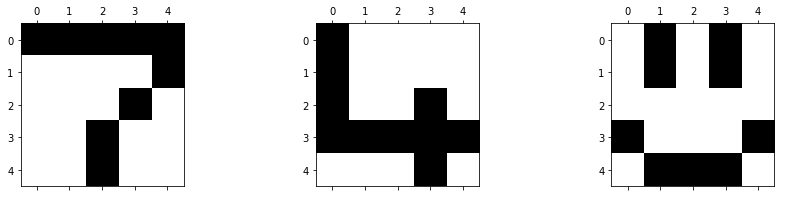

distorted with ratio 0.2


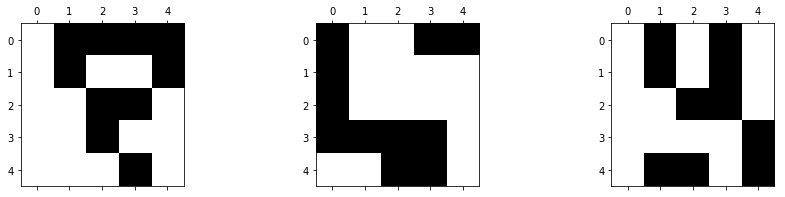

recalled


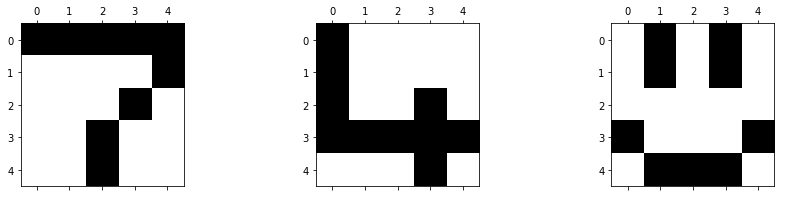

In [6]:
show([3, 4, 5], .2)

using patterns [0, 1, 2, 3, 4, 5] (0.24 N)


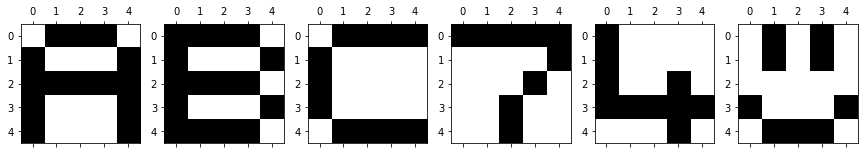

distorted with ratio 0.2


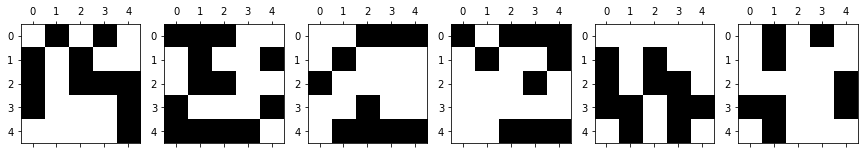

recalled


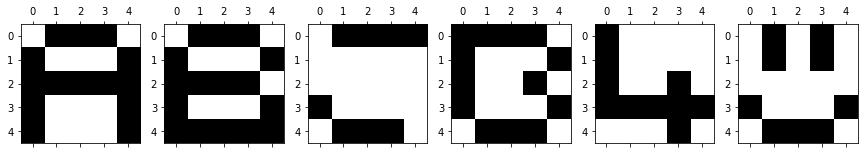

In [7]:
show([0, 1, 2, 3, 4, 5], .2)